In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
import math
import k3match

from Utilities.operators import calc_grad, make_tree

In [2]:
sim_tree, X, Y, Z, Vol, VX, _, _, Den, _, _ = make_tree('TDE/683', 683, True)
dim_cell = (3*Vol/(4*np.pi))**(1/3)

In [3]:
#choose an easy function to know its derivative
VX = np.sin(2*np.pi * X/35_000) 

In [6]:
grad_test = []
to_plot = []
X_plot = [] 
Y_plot = [] 
Z_plot = [] 

for i in range(0,len(X),1000):
    point = [X[i],Y[i],Z[i]]

    if X[i]<-8_000 or X[i]>3000 or Y[i]<-8_000 or Y[i]>3000 or Z[i]<-5_000 or Z[i]>2_000:
        continue

    pointsel, _, dist = k3match.cartesian(X, Y, Z, X[i], Y[i], Z[i], 2*dim_cell[i])
    dist = np.delete(dist, [np.argmin(dist)])
    pointsel = np.delete(pointsel, [np.argmin(dist)])

    idx = pointsel[np.argmin(dist)]

    deltax = np.abs(X[i]-X[idx])
    deltay = np.abs(Y[i]-Y[idx])
    deltaz = np.abs(Z[i]-Z[idx])
    delta = min([deltax, deltay, deltaz])

    dsx = calc_grad(sim_tree, X, Y, Z, VX, point, delta)[0]
    if math.isnan(np.linalg.norm(dsx)):
        continue

    to_plot.append(2*np.pi * np.cos(2*np.pi*X[i]/ 35_000) / 35_000)#d/dx(sinx)
    X_plot.append(X[i])
    Y_plot.append(Y[i])
    Z_plot.append(Z[i])
    grad_test.append(dsx)


16019000
16021000
16022000
16023000
16024000
16025000
16026000
16027000
16028000
16029000
16030000
16031000
16032000
16033000
16034000
16035000
16037000
16038000
lots of iterations for div/grad in x for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
lots of iterations for div/grad in y for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
lots of iterations for div/grad in z for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
lots of iterations for div/grad in x for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
lots of iterations for div/grad in y for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
lots of iterations for div/grad in z for point [-7936.727500545787, 948.2584583480777, -51.34583948057916]
16039000
16040000
16041000
16042000
16043000
16044000
lots of iterations for div/grad in x for point [-7947.890800510408, 941.0462596452908, 84.96067008372339]
lots of iterations for div/grad in y

In [7]:
grad_test = np.array(grad_test)
to_plot = np.array(to_plot)
ratio_test = 1 - grad_test / to_plot


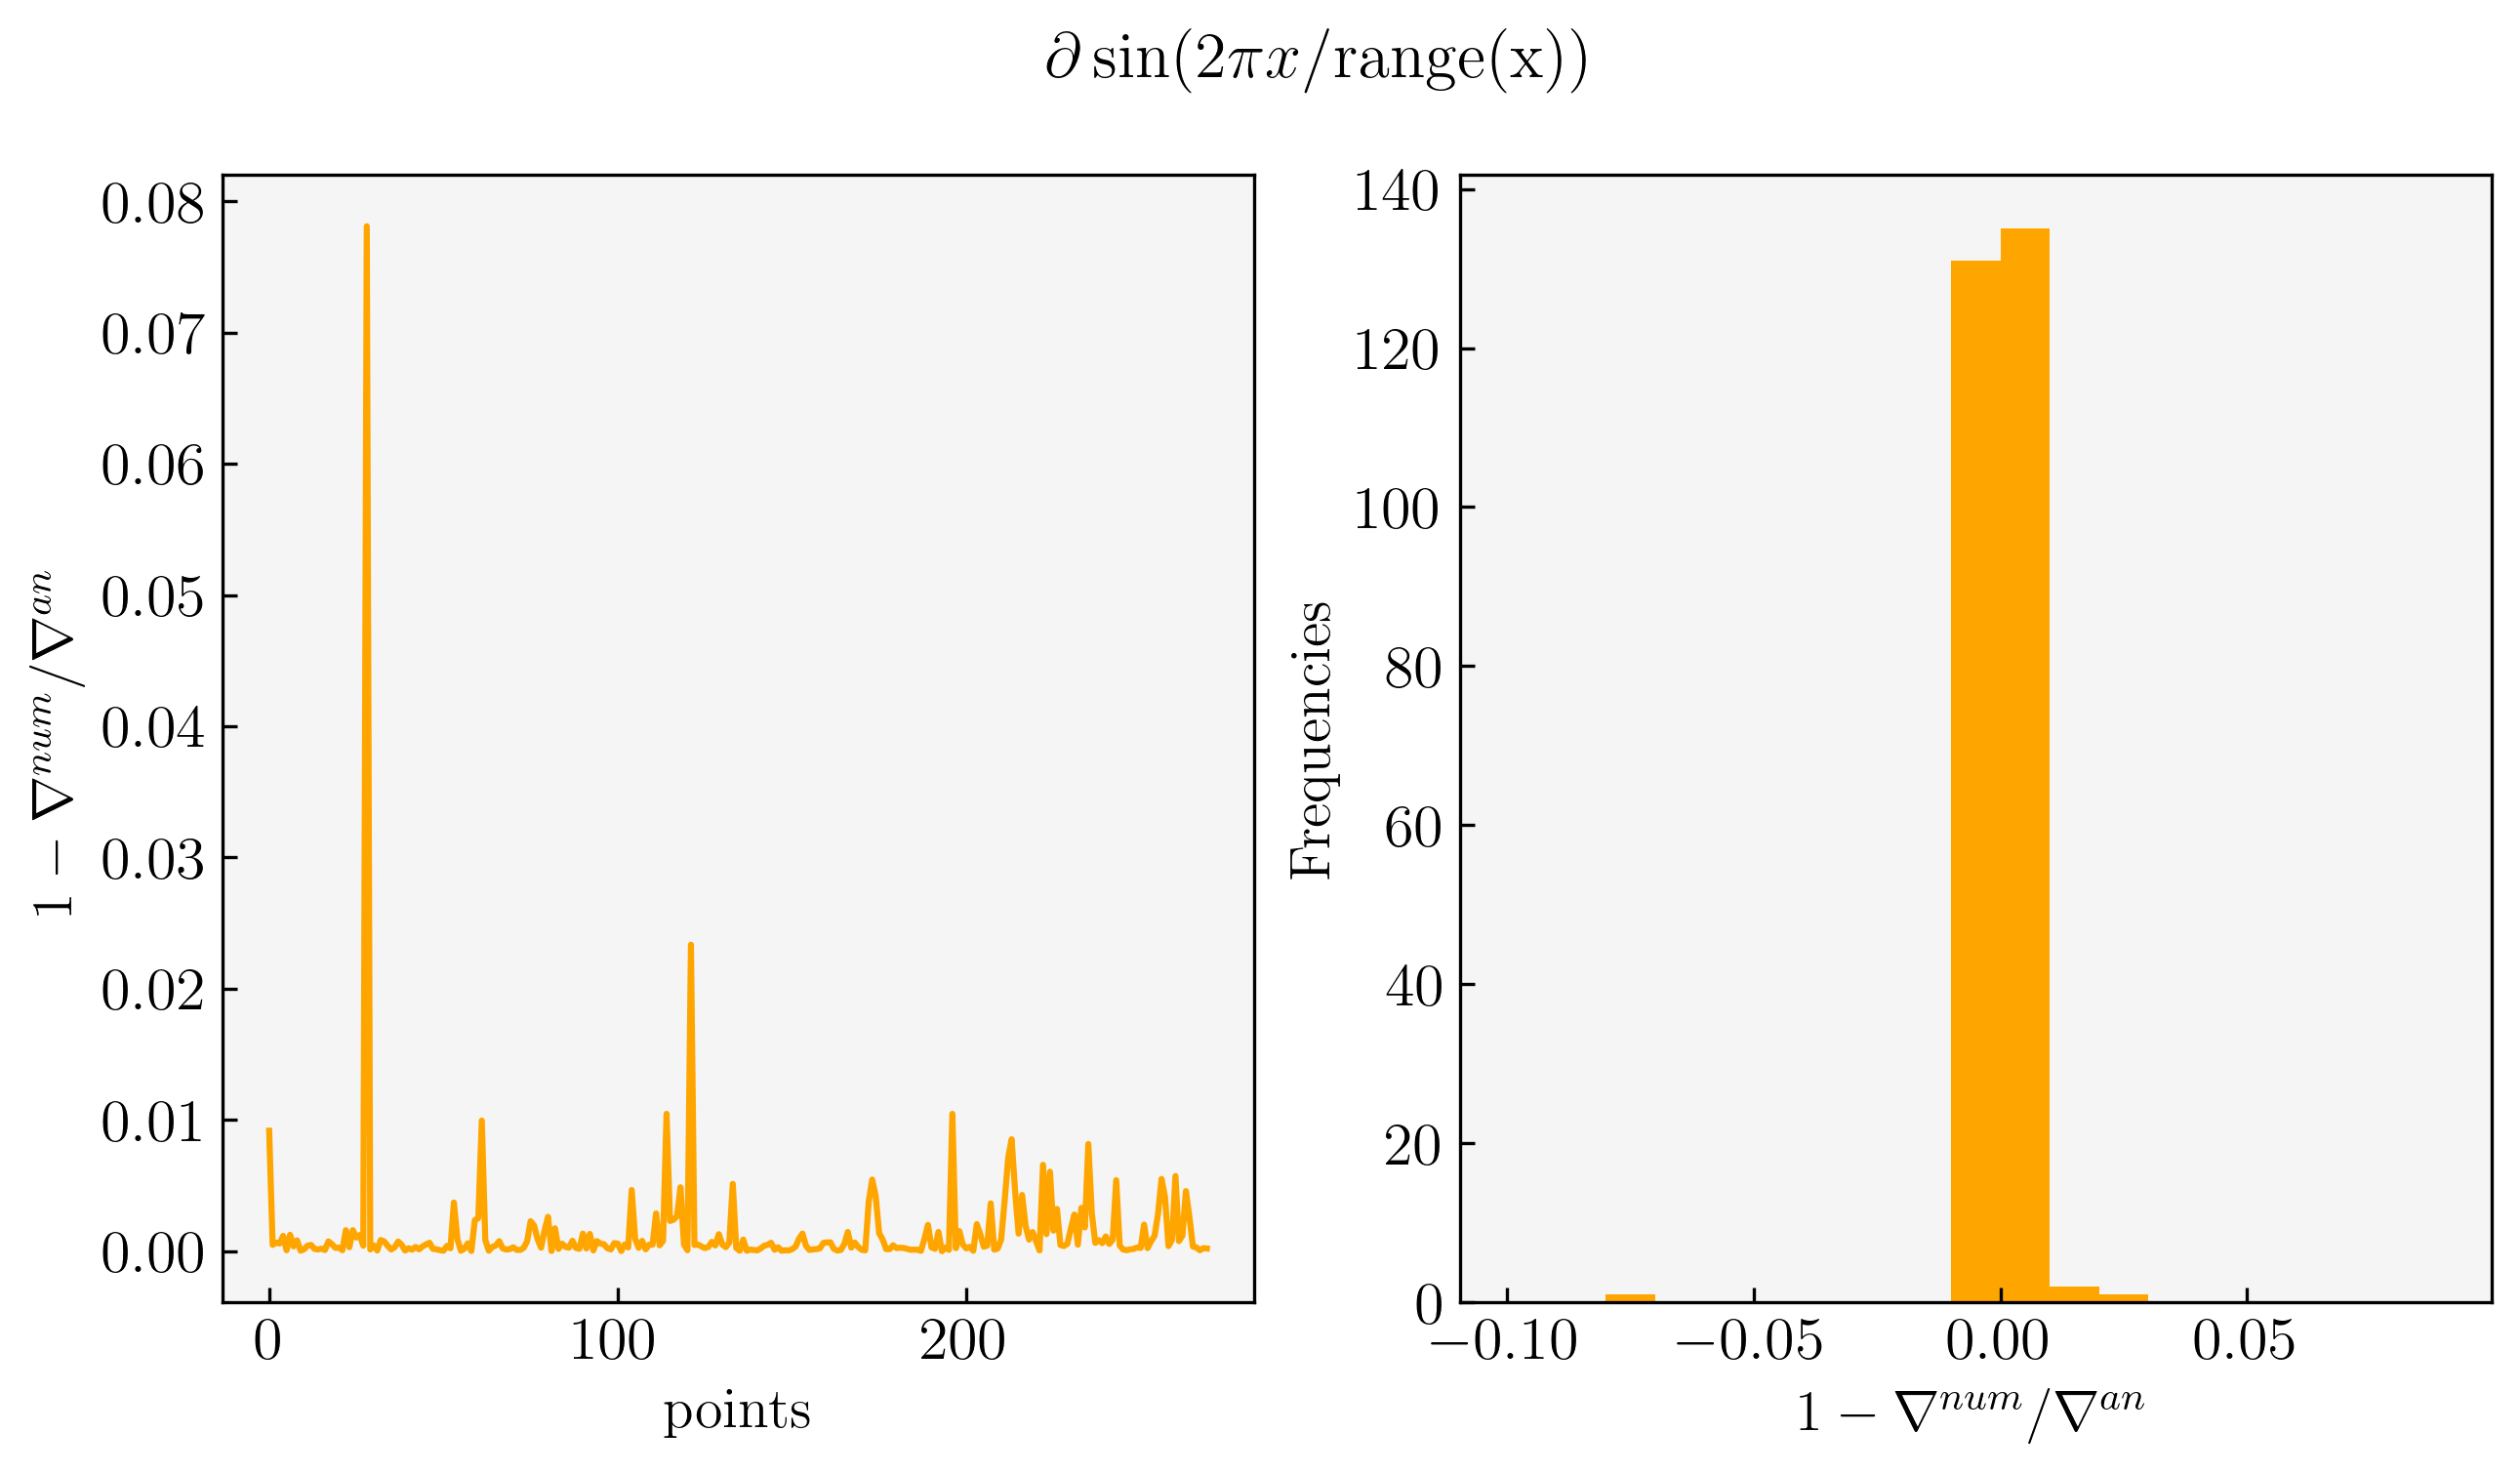

In [14]:
# Gradient T
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set_xlabel('points', fontsize = 14)
ax[0].set_ylabel(r'$1-\nabla^{num}/\nabla^{an}$', fontsize = 14)
ax[0].plot(np.abs(ratio_test), c = 'orange',label = 'now')
#ax[0].plot(np.abs(ratio_test), 'o', c = 'orange')

#ax[0].plot(to_plot, c = 'b', label = 'analytical')
bins = np.arange(-0.1, 0.1, 0.01)
ax[1].hist(ratio_test, bins=bins, color = 'orange', label = 'now')

ax[1].set_xlabel(r'$1-\nabla^{num}/\nabla^{an}$', fontsize = 14)
ax[1].set_ylabel('Frequencies', fontsize = 14)

plt.suptitle(r'$\partial\sin(2\pi x/$range(x))', fontsize = 16)
plt.savefig(f'Figs/TESTTDE_grad.png')